In [8]:
import torch
from torch import optim
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchsummary import summary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from torchviz import make_dot
from torch.utils.data import DataLoader
from pathlib import Path
import pandas as pd

from autoencoder import AutoEncoder
import pickle

import umap

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mpl.rcParams['figure.dpi'] = 150

In [10]:
out_path = Path("/home/amal/UbuntuDocuments/projects/generative_modelling/saved_models")

In [11]:
latent_dim = 200

model = AutoEncoder(latent_dim=latent_dim)
model.to(device)
checkpoint_path = out_path / f"autoencoder_epoch_14.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

AutoEncoder(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Sequ

In [12]:
data_path = "/home/amal/UbuntuDocuments/data/torch_datasets"
validation_data =  datasets.CelebA(data_path, split="valid", transform=transforms.PILToTensor(), download=True)

Files already downloaded and verified


In [13]:
batch_size = 1024
val_dataloader = DataLoader(validation_data, batch_size=batch_size,)

In [14]:
def encode_dataset(
    model: torch.nn.Module, 
    dataloader: DataLoader,
    device,
):

    encoded = []
    attributes = []
    
    model.eval()
    with torch.no_grad():
        for indx, batch in enumerate(dataloader):
            input_image = batch[0]
            input = torch.tensor(input_image/255, dtype=torch.float).to(device)
            _enc = model.encode(input)
            encoded.append(_enc.detach().cpu())
            attributes.append(batch[1])

            if indx > 6:
                break

    return torch.cat(encoded, dim=0), torch.cat(attributes, dim=0)

In [15]:
encoded, attributes = encode_dataset(model, val_dataloader, device)

/tmp/ipykernel_9476/1741056253.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(input_image/255, dtype=torch.float).to(device)


In [17]:
encoded.shape

torch.Size([8192, 200])

In [65]:
mus = torch.mean(encoded, 0)
sigmas = torch.std(encoded, dim=0)
N_samples = 20

In [66]:
mus = mus.unsqueeze(0).repeat(N_samples, 1)
sigmas = sigmas.unsqueeze(0).repeat(N_samples, 1)

In [78]:
random_vectors = torch.normal(mean=mus, std=sigmas).to(device)


In [79]:
model.eval()
generated_image = model.decode(random_vectors)

In [80]:
generated_image=generated_image.detach().cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


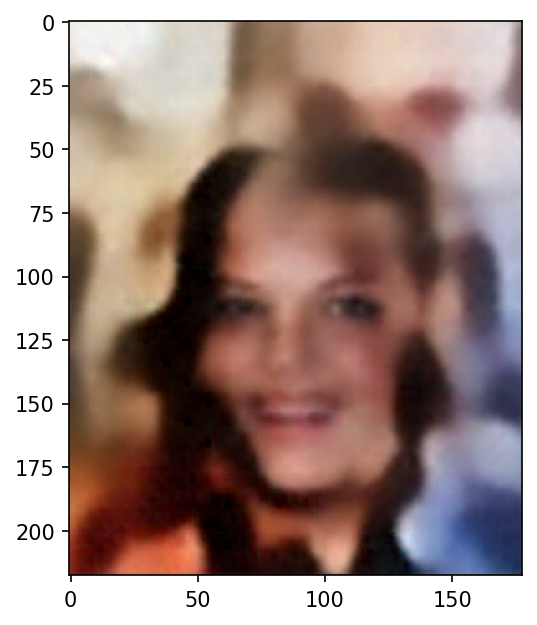

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


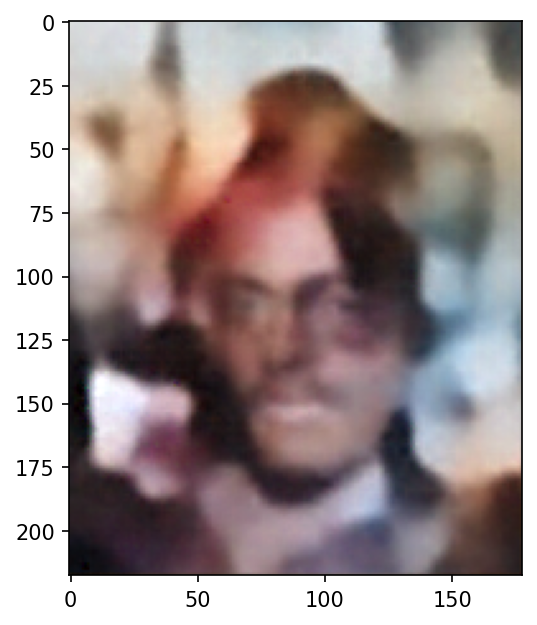

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


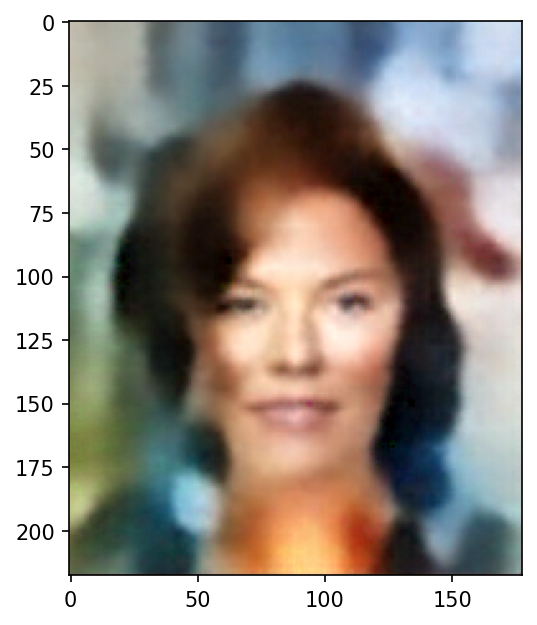

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


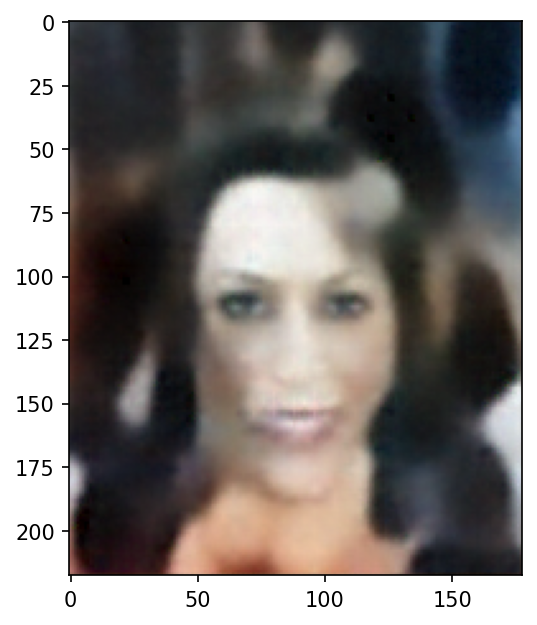

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


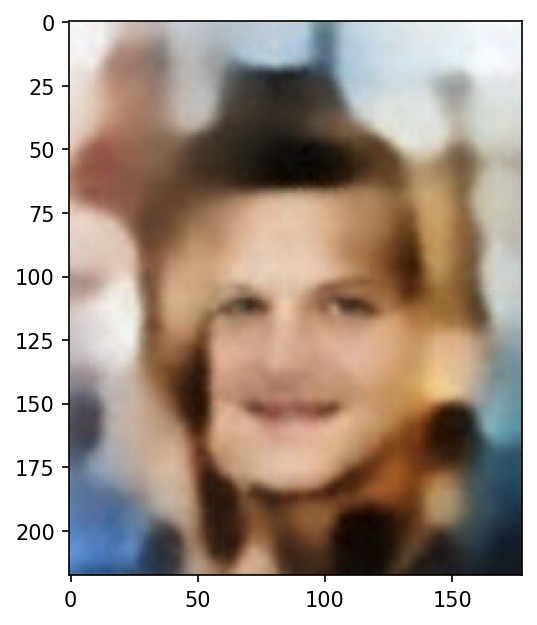

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


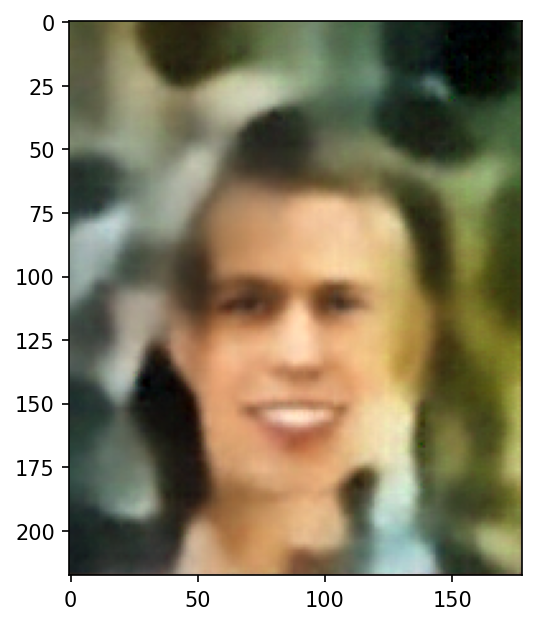

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


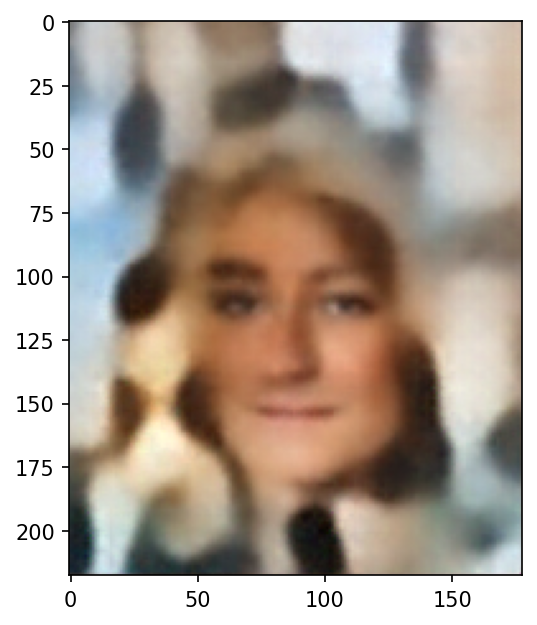

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


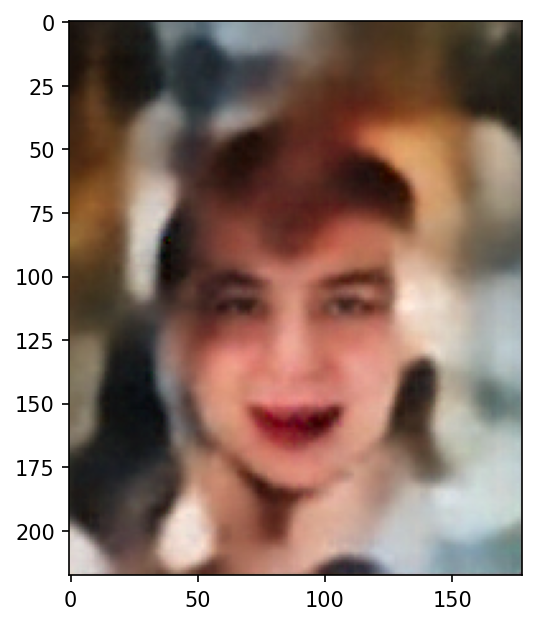

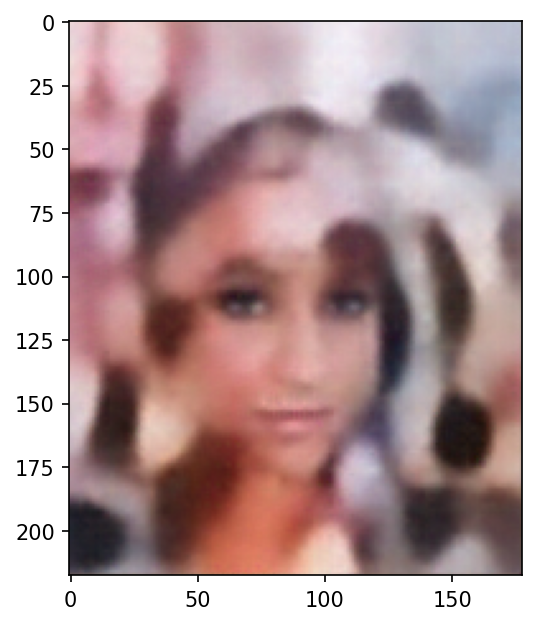

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


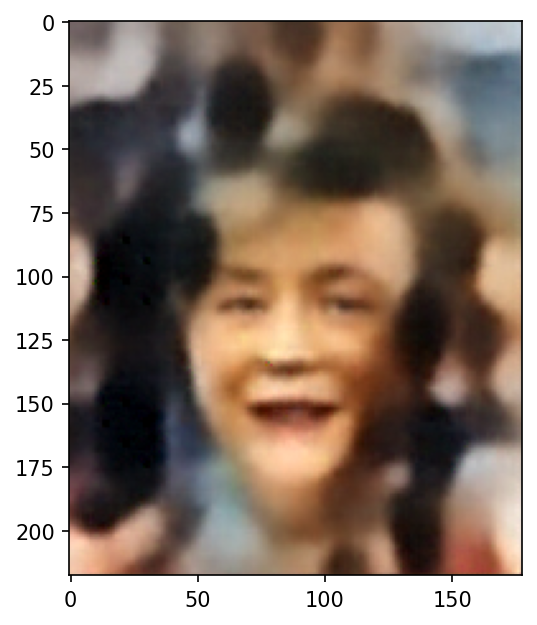

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


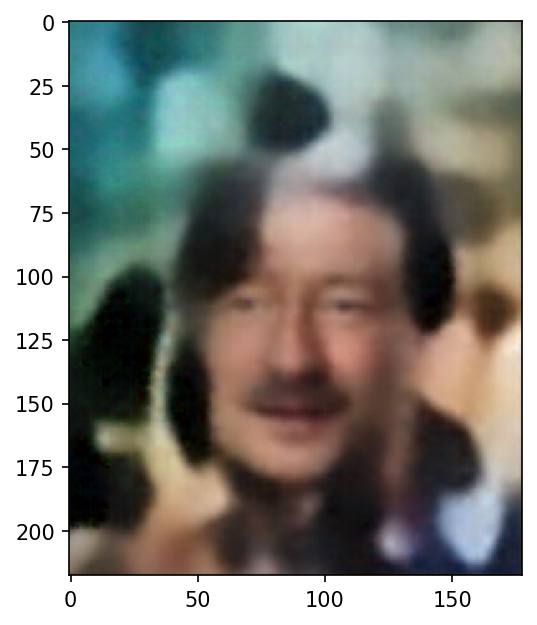

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


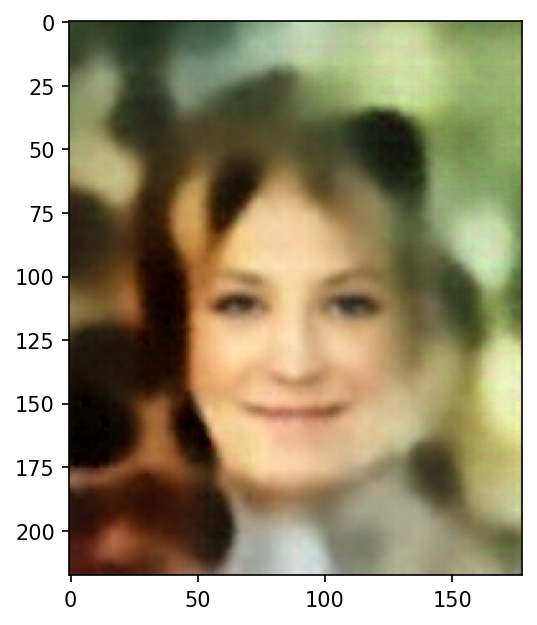

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


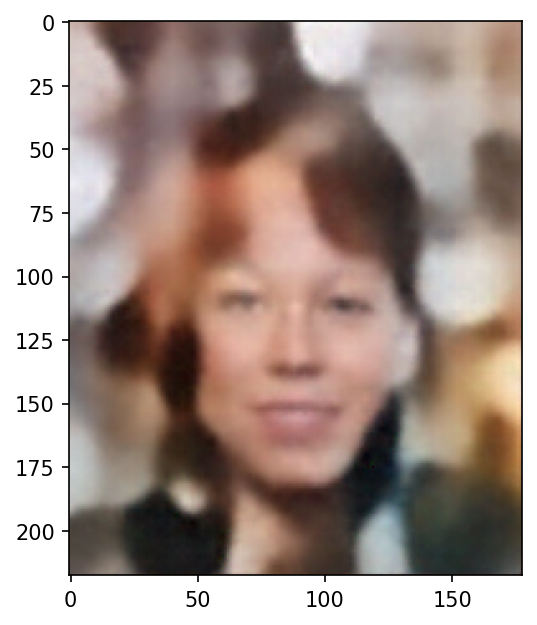

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


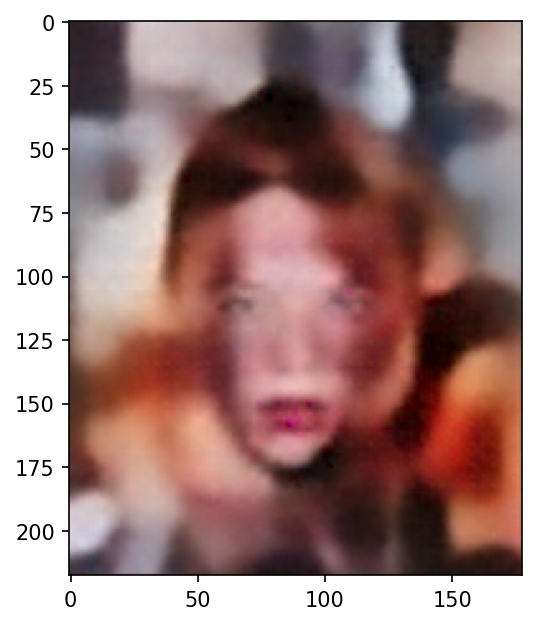

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


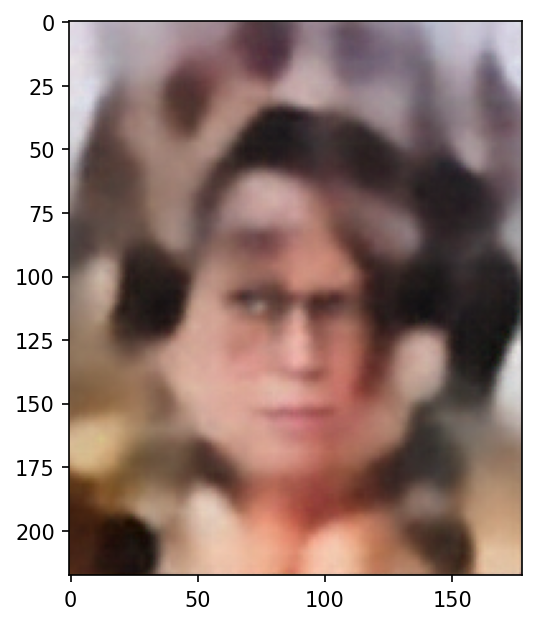

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


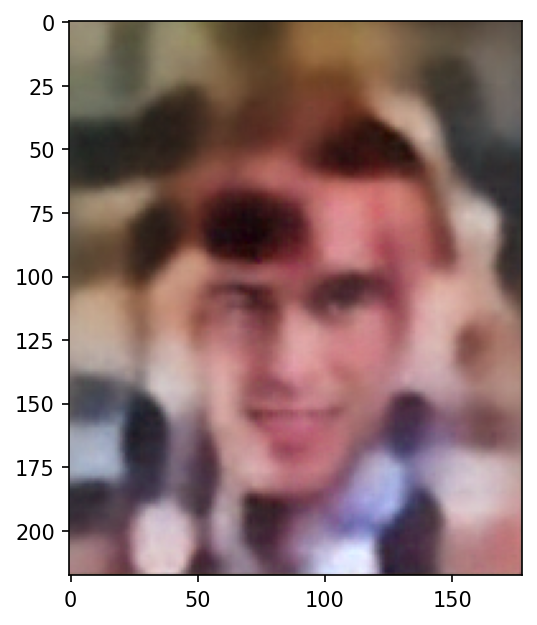

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


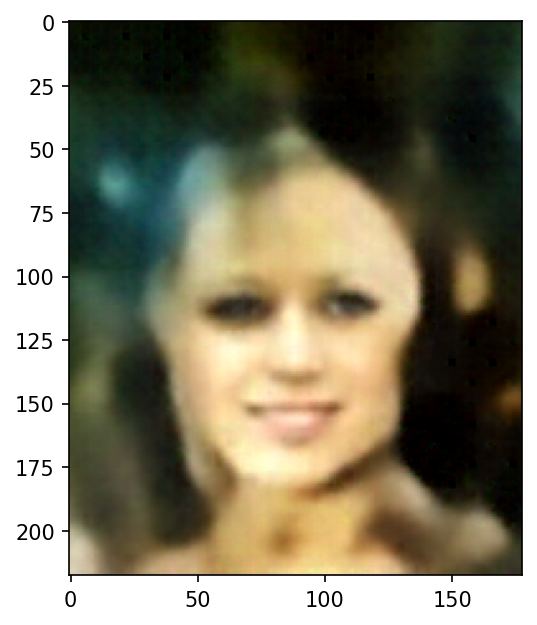

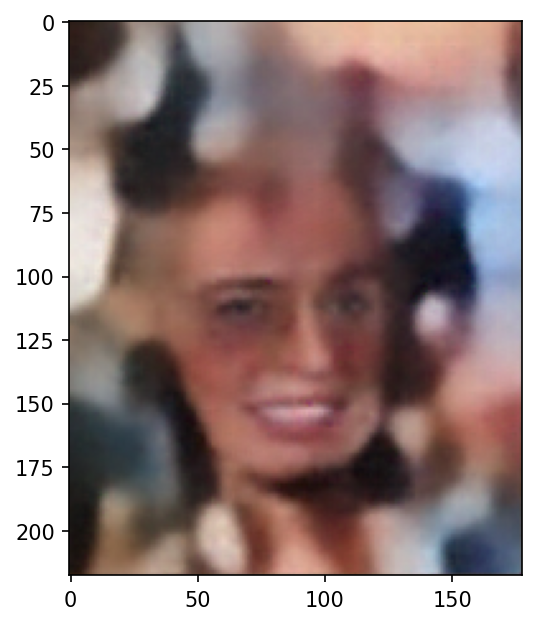

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


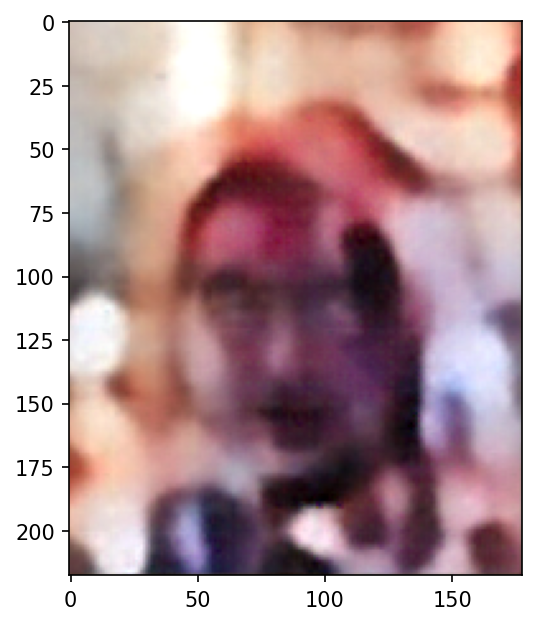

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


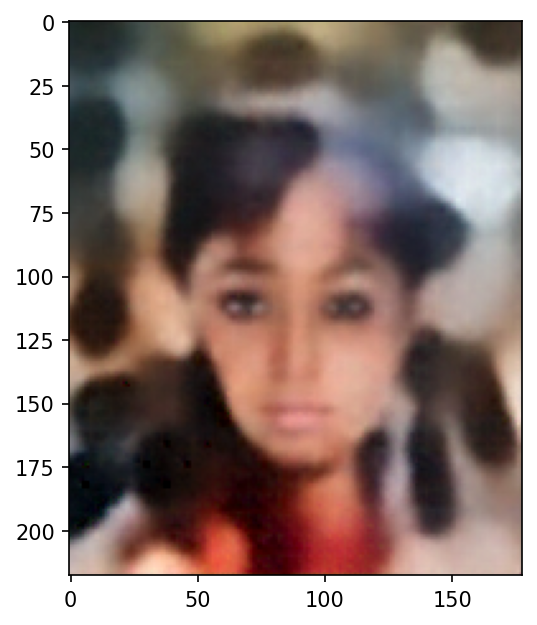

In [81]:
for i in range(N_samples):
    plt.imshow(generated_image[i, :].squeeze().permute(1, 2, 0))
    plt.show()